Correlation -  
Relation between two variables. It is measred using Pearson coefficient which ranges from [-1, +1].  

For any given two variables X and Y :  
If the coefficient is 1, the realtion between two variables is positive (if X increases/decreases, Y increases/decreases respectively).  
If the coefficient is -1, the realtion between two variables is negative (if X decreases/increases, Y increases/decreases respectively).  
If the coefficient is 0, there is no realtion between two variables (if X increases/decreases, Y may/maynot show any changes).  


In Time-Series we take the main series values with its own lagged values for correlation. This is Auto-Correlation.  

# Auto Regression Integrated Moving Average (ARIMA) -  

Since Auto-Regression and Moving-Average models shouldn't be applied on series with trends and seasonality, this ARIMA model includes the method of differencing (to de-seasonalize and de-trendify data series). It is good for handling trends but not seasonality.  

Steps-  
-> We 1st remove the trend from series using differencing method. To remove non-linear trend from the series, wee have to do differencing several times.  
-> Now we apply auto regression on this new series to get initial set of forecasting.    
-> Using the initial forecast we find the residuals and forecast errors. Then we apply moving average method on these residuals to update our forecast.  
-> Now we do de-differencing (adding back the lag values to our forecast to add the trend effect).  

Parameters-  
-> P (Order of Auto-Regression) - How many lag values to choose.  
-> D (Order of Integration) - Number of differencing needed.  
-> Q (Order of Moving-Average) - Window size of moving average.  



In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 

from pandas.plotting import autocorrelation_plot 

In [2]:
dateparse = lambda x: pd.to_datetime(x, format='%d-%m') 

shm_data = pd.read_csv('../Datasets/shampoo.csv', header=0, parse_dates=[0], date_format=dateparse)   
shm_data 

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


<Axes: >

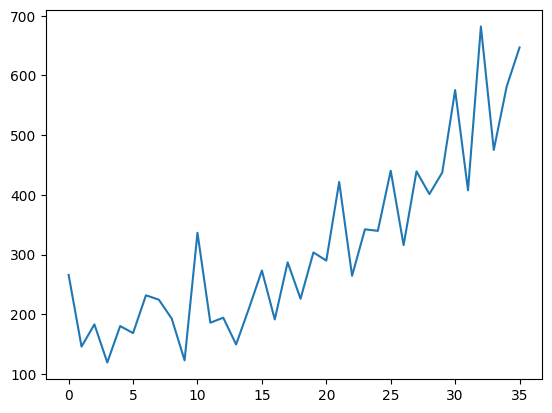

In [3]:
shm_data['Sales'].plot() 

Since this plot states that the trend is polynomial, we will have to use two differencing to make it stationary. (D = 2)   

Autocorrelation plot - 

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

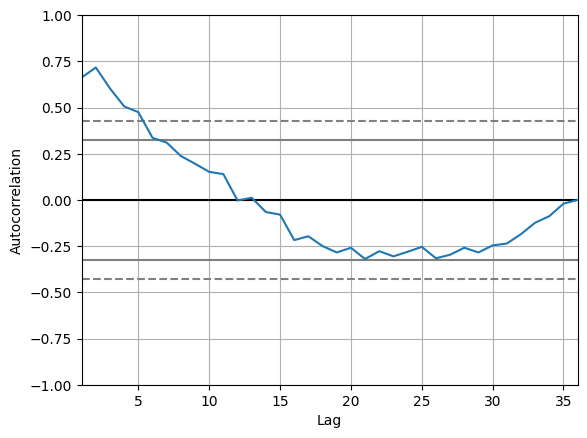

In [4]:
autocorrelation_plot(shm_data['Sales']) 

For autocorrelation, if the autocorrelation plot is crossing at the confidence interval line, take the X-axis point from the intersection.  
(P = 5)  